In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import os

In [2]:
#output = load('hists_ttcom_dummy_sample.coffea')
output = load('hists_fattag_6files.coffea')
output

{'jet_pt': <Hist (dataset,pt) instance at 0x7f62ac0d56d0>,
 'jet_eta': <Hist (dataset,eta) instance at 0x7f61d16af3d0>,
 'jet_phi': <Hist (dataset,phi) instance at 0x7f61d16af790>,
 'jet_mass': <Hist (dataset,mass) instance at 0x7f61d16afb90>,
 'btagCMVA': <Hist (dataset,btagCMVA) instance at 0x7f61d16aff90>,
 'btagCSVV2': <Hist (dataset,btagCSVV2) instance at 0x7f61d16b3350>,
 'btagDeepB': <Hist (dataset,btagDeepB) instance at 0x7f61d16b36d0>,
 'btagDeepC': <Hist (dataset,btagDeepC) instance at 0x7f61d16b3a50>,
 'btagDeepFlavB': <Hist (dataset,btagDeepFlavB) instance at 0x7f61d16b3dd0>,
 'btagDeepFlavC': <Hist (dataset,btagDeepFlavC) instance at 0x7f61d16b6190>,
 'fatjet_tau1': <Hist (dataset,tau1) instance at 0x7f61d16b6510>,
 'fatjet_tau2': <Hist (dataset,tau2) instance at 0x7f61d16b68d0>,
 'fatjet_tau21': <Hist (dataset,tau21) instance at 0x7f61d16b6c90>,
 'fatjet_pt': <Hist (dataset,pt) instance at 0x7f61d16ba090>,
 'fatjet_eta': <Hist (dataset,eta) instance at 0x7f61d16ba410>,
 '

In [3]:
output['btagDDBvLV2'].values()

{('MuEnriched',): array([3.708e+03, 3.080e+02, 1.660e+02, 9.600e+01, 7.900e+01, 5.300e+01,
        3.500e+01, 3.200e+01, 1.600e+01, 1.500e+01, 1.800e+01, 2.300e+01,
        1.600e+01, 1.000e+01, 1.100e+01, 6.000e+00, 9.000e+00, 6.000e+00,
        5.000e+00, 7.000e+00, 1.000e+00, 8.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 ('GluGluHToCC',): array([18.,  5.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

jet_pt jet_eta


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


jet_phi jet_mass
btagCMVA btagCSVV2
btagDeepB btagDeepC
btagDeepFlavB btagDeepFlavC
fatjet_tau1 fatjet_tau2
fatjet_tau21 fatjet_pt
fatjet_eta fatjet_phi
fatjet_mass btagDDBvLV2
btagDDCvLV2 btagDDCvBV2
ccfatjet_tau1 ccfatjet_tau2


/work/mmarcheg/miniconda3/envs/btv/lib/python3.7/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/work/mmarcheg/miniconda3/envs/btv/lib/python3.7/site-packages/mplhep/plot.py:307: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/work/mmarcheg/miniconda3/envs/btv/lib/python3.7/site-packages/mplhep/plot.py:318: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/work/mmarcheg/miniconda3/envs/btv/lib/python3.7/site-packages/mplhep/plot.py:321: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/work/mmarcheg/miniconda3/envs/btv/lib/python3.7/site-packages/mplhep/plot.py:322: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_arr[i]
/work/mmarcheg/miniconda3/envs/b

ccfatjet_tau21 ccfatjet_pt
ccfatjet_eta ccfatjet_phi
ccfatjet_mass njet
nbjet nel


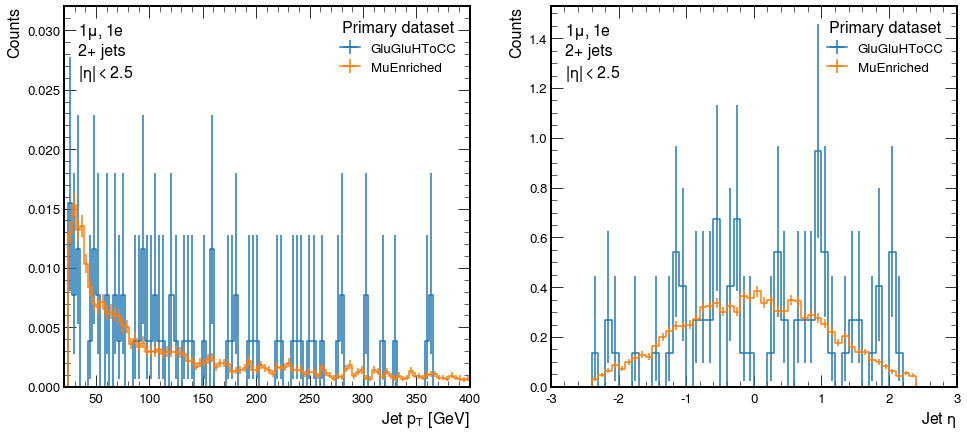

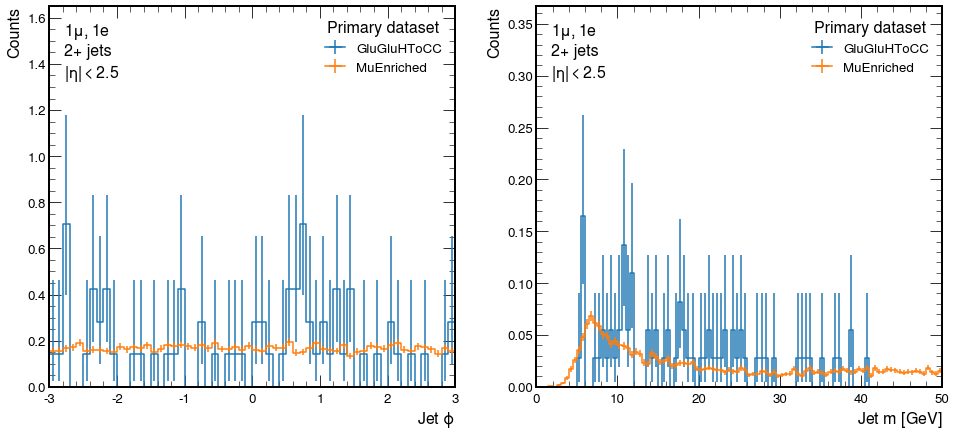

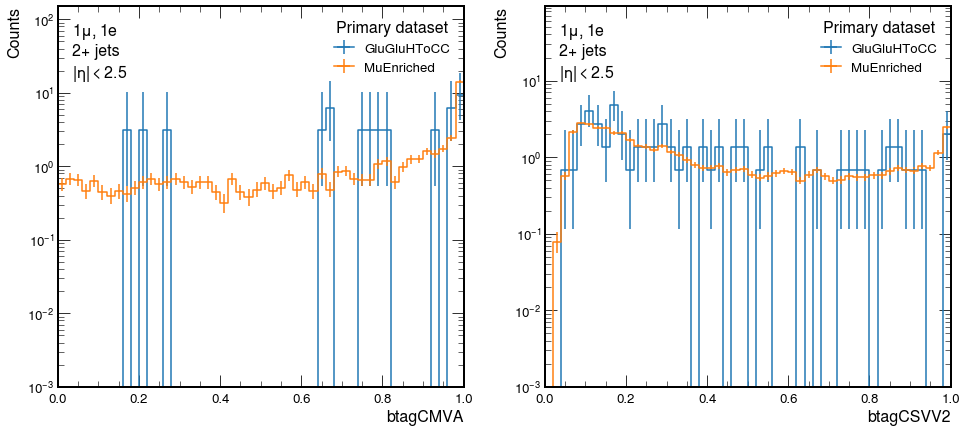

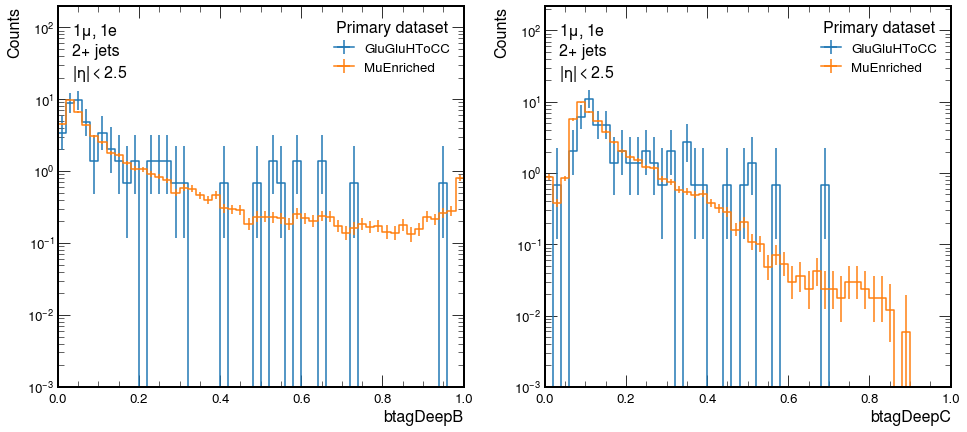

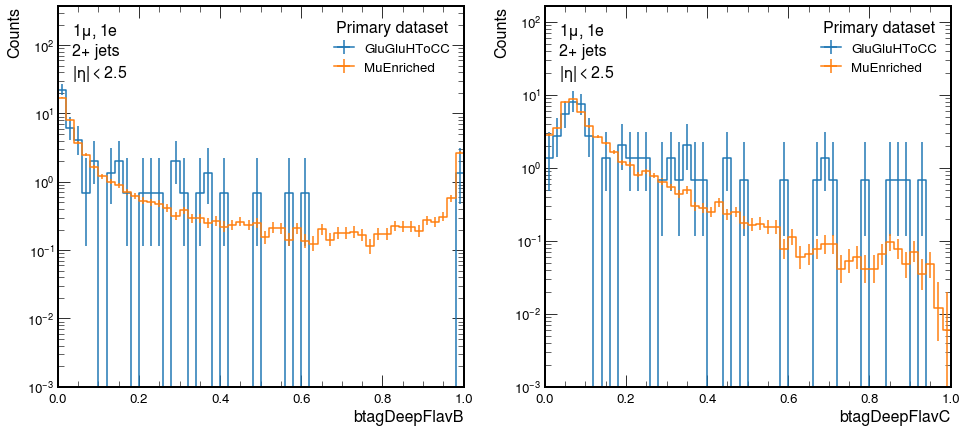

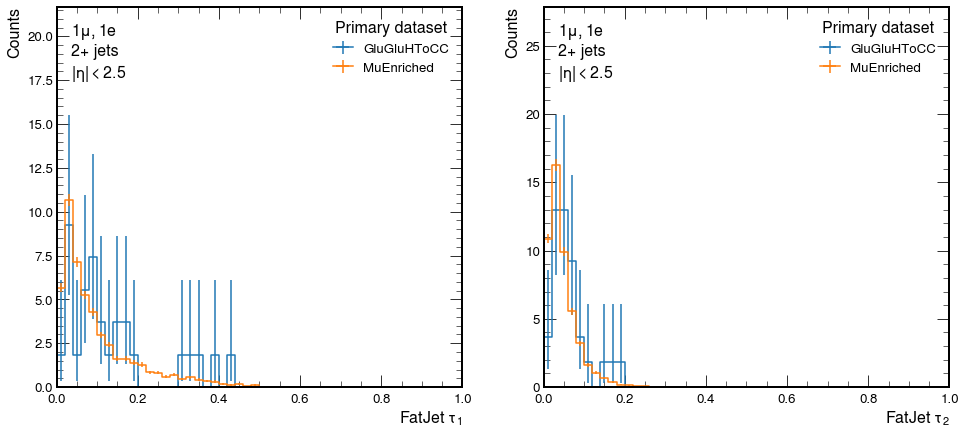

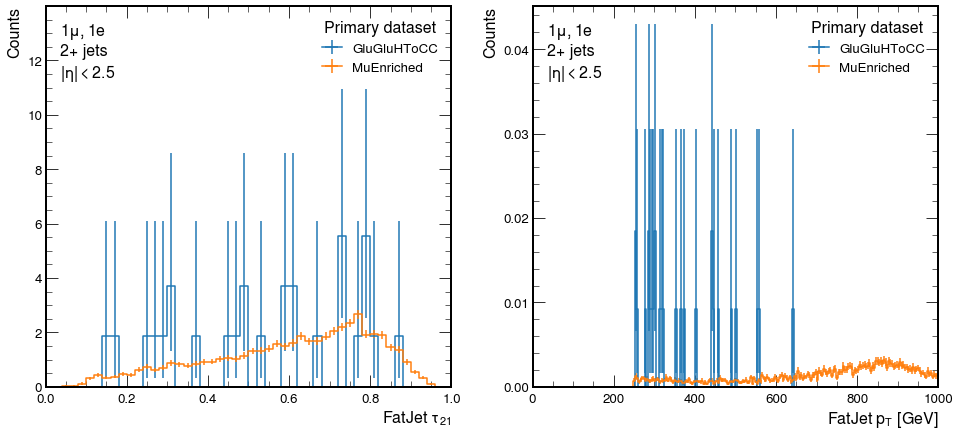

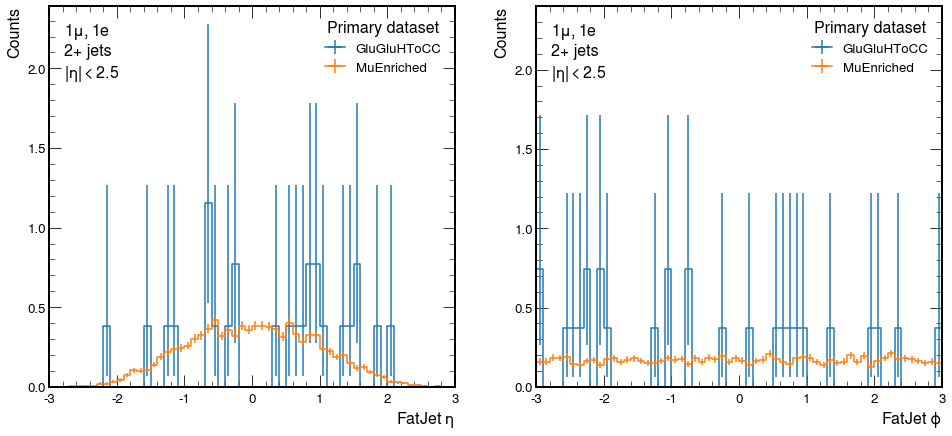

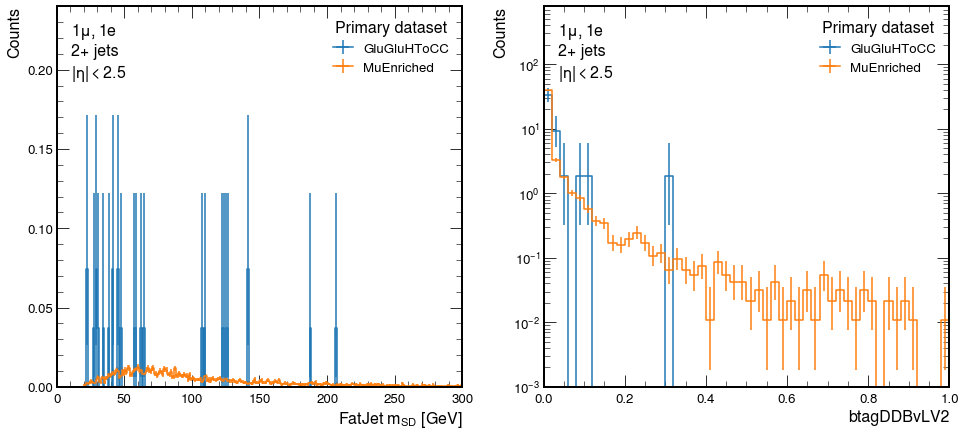

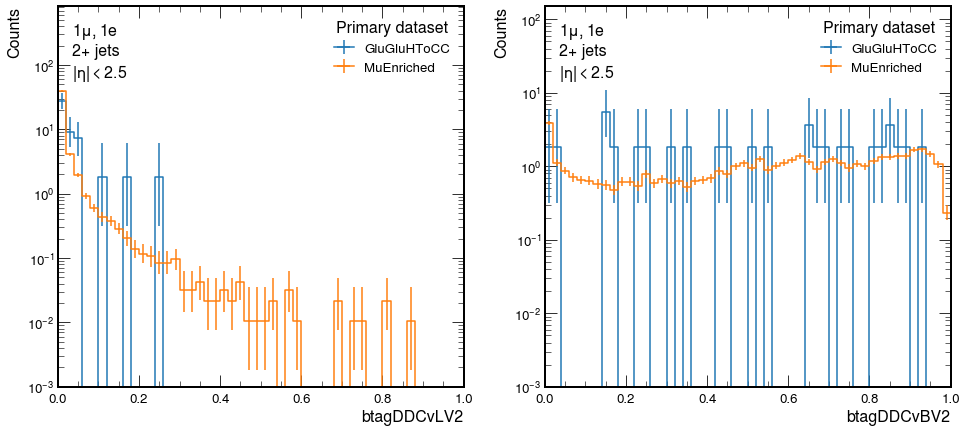

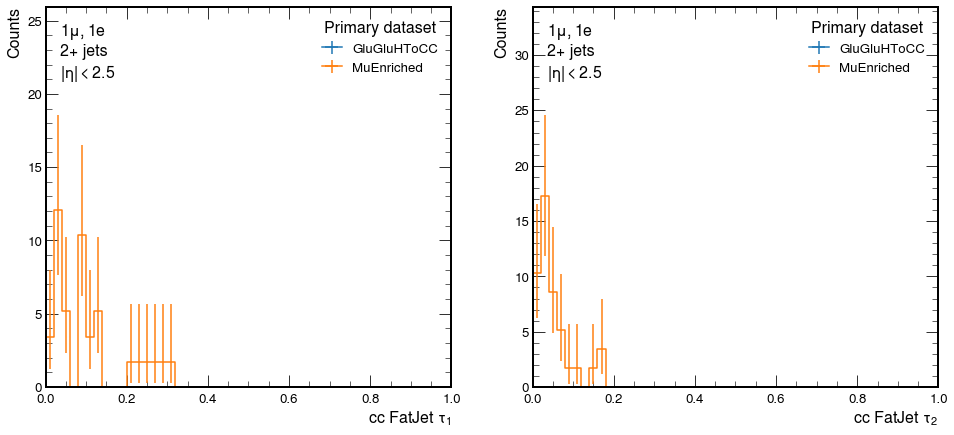

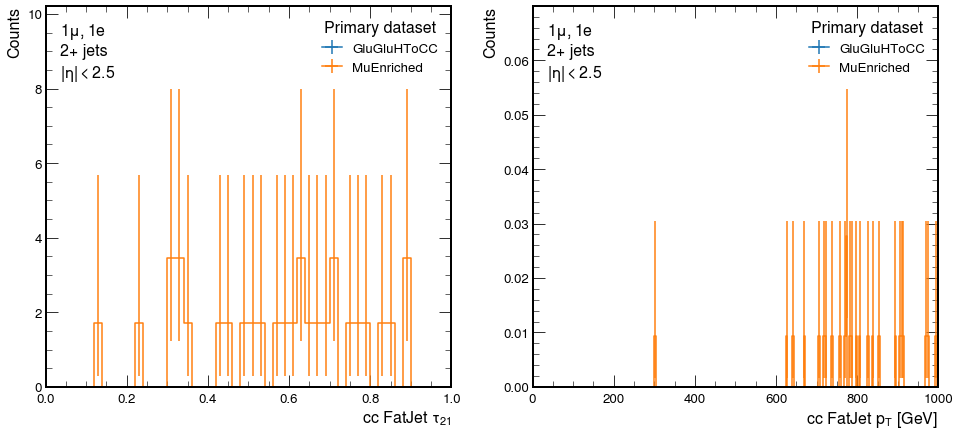

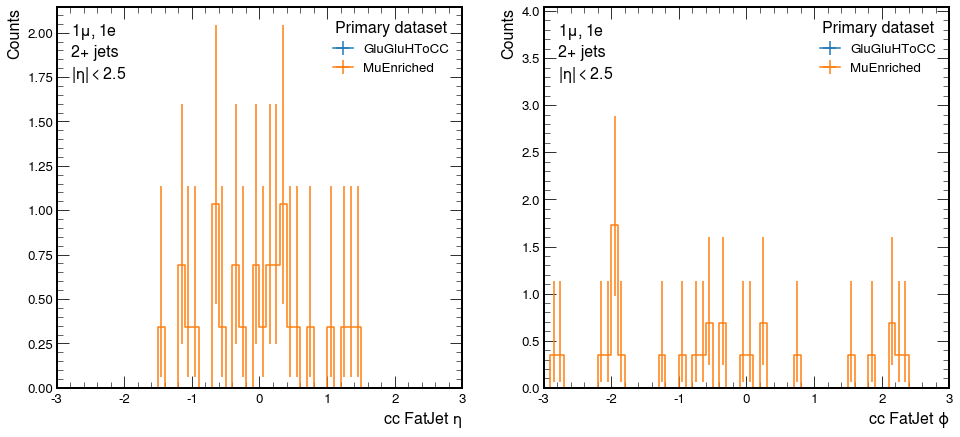

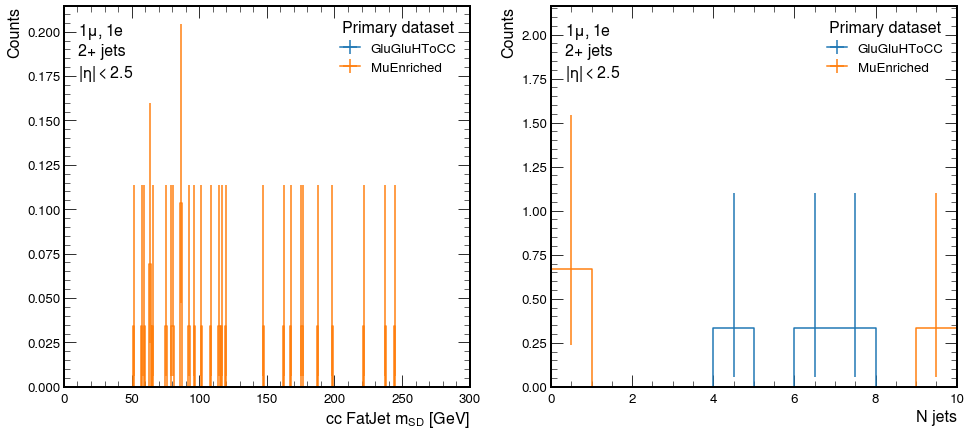

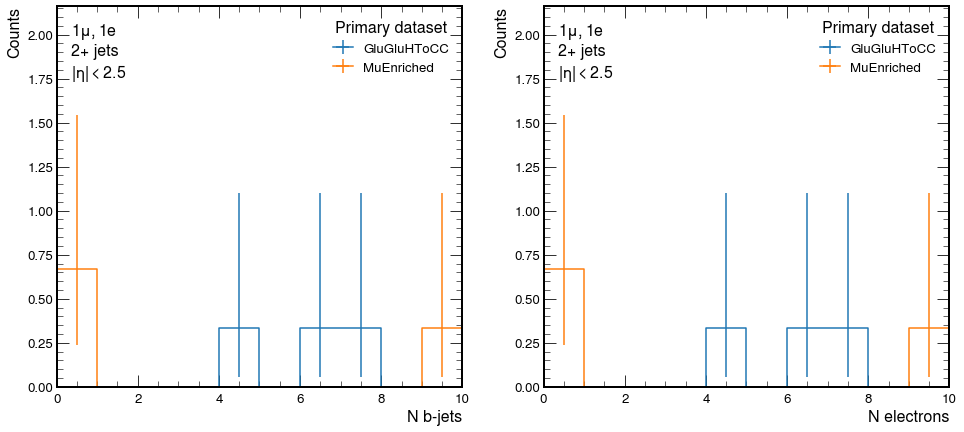

In [4]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])
plot_dir = "plots/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
for i in range(0, int(round(len(output.keys())))-1, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    print(h1name, h2name)
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    h1 = output[h1name]
    h2 = output[h2name]
    dense = True
    
    for ax, h in zip([ax1, ax2], [h1, h2]):
        if hasattr(h, 'dim'):
            plot.plot1d(h, ax=ax, legend_opts={'loc':1}, density=dense);
        else:
            continue    
        #break
    for ax, hname in zip([ax1, ax2], [h1name, h2name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        if hname.startswith("btag"):
            ax.semilogy()
        ax.set_ylim(0.001, None)
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)
    plt.savefig(plot_dir + h1name + "_" + h2name + ".png", dpi=300, format="png")